In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### 1. 주어진 엑셀 데이터를 읽어 R 데이터프레임 smokers로 저장하여라.

In [2]:
# data read
smokes = pd.read_excel('smoke.xlsx')

##### 2. smokers에서 자료의 수(레코드의 수)를 구하시오.

In [3]:
smokes.shape[0]

99

##### 3. smokers 자료의 앞에서 부터 10개의 레코드를 출력하여라.

In [4]:
smokes.head(10)

,Gender,Age,Smoker,HowLong,Cigarettes,Height,Waist,Hips,Weight
0,F,40,no,0,0,165.0,95.0,90.0,72.0
1,M,37,no,0,0,192.0,97.0,87.0,107.0
2,F,35,yes,28,15,175.0,70.0,80.0,65.0
3,M,61,no,0,0,187.5,105.0,87.5,95.0
4,F,60,yes,42,20,173.0,77.5,72.5,60.0
5,F,17,no,0,0,165.0,75.0,82.5,60.0
6,F,23,no,0,0,168.0,80.0,100.0,80.0
7,M,63,no,0,0,178.0,97.5,105.0,87.0
8,M,41,no,0,0,175.0,85.0,85.0,80.0
9,M,17,yes,3,11,185.0,76.0,90.0,79.5


##### 4. 자료에서 여자와 남자의 수를 구하시오.

In [5]:
smokes.groupby(['Gender']).agg({'Gender':['count']})

,Gender
,count
Gender,
F,41
M,58


##### 5. 자료에서 흡연자의 수와 흡연비율을 구하시오.


In [6]:
smokes[smokes['Smoker'].isin(['yes'])].shape[0]

37

In [7]:
smokes.groupby(['Smoker']).agg({'Smoker':['count']}) / smokes.shape[0]

,Smoker
,count
Smoker,
no,0.626263
yes,0.373737


##### 6. 자료에서 성별 흡연자의 수와 흡연비율을 구하시오.

In [8]:
smokes[smokes['Smoker'].isin(['yes'])].groupby(['Gender']).agg({'Gender':['count']})

,Gender
,count
Gender,
F,15
M,22


In [9]:
smokes.groupby(['Gender','Smoker']).agg({'Smoker':['count']}) / smokes.shape[0]

Smoker
                  count
Gender Smoker          
F      no      0.262626
       yes     0.151515
M      no      0.363636
       yes     0.222222

###### 7. BMI(체질량지수)는 몸무게를 키의 제곱으로 나눈 값이다. 자료에서 BMI를 구하여라.


In [10]:
smokes['BMI'] = smokes.Weight /(smokes.Height/100) **2

In [11]:
smokes.head()

,Gender,Age,Smoker,HowLong,Cigarettes,Height,Waist,Hips,Weight,BMI
0,F,40,no,0,0,165.0,95.0,90.0,72.0,26.446281
1,M,37,no,0,0,192.0,97.0,87.0,107.0,29.025608
2,F,35,yes,28,15,175.0,70.0,80.0,65.0,21.224490
3,M,61,no,0,0,187.5,105.0,87.5,95.0,27.022222
4,F,60,yes,42,20,173.0,77.5,72.5,60.0,20.047446


##### 8. 성별 BMI의 평균과 표준편차를 구하라.

In [12]:
smokes.groupby('Gender').agg({'BMI':['mean','std']})

BMI          
             mean       std
Gender                     
F       24.964102  4.672947
M       24.916288  3.881596

##### 9. 성별 BMI를 상자그림으로 그려라.


Text(0.5, 1.0, 'Gender BMI Box Plot')

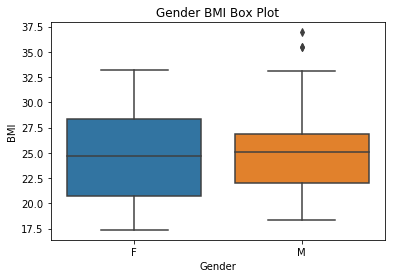

In [13]:
sns.boxplot(x="Gender", y="BMI", data=smokes)
plt.title("Gender BMI Box Plot")

##### 10. 흡연 및 비흡연자의 BMI의 평균과 표준편차를 구하라.

In [14]:
smokes.groupby('Smoker').agg({'BMI':['mean','std']})

BMI          
             mean       std
Smoker                     
no      24.987056  3.875615
yes     24.850687  4.759915

##### 11. 흡연 및 비흡연자의 BMI를 상자그림으로 그려라.


Text(0.5, 1.0, 'Smoker BMI Box Plot')

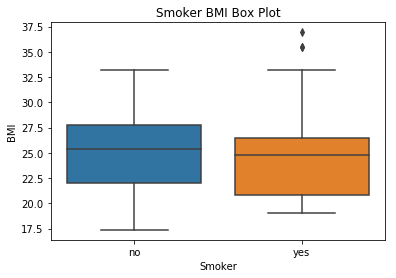

In [15]:
sns.boxplot(x='Smoker',y='BMI',data=smokes)
plt.title('Smoker BMI Box Plot')